In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [7]:
df = pd.read_csv('C:\\Users\\MOUMITA\\Desktop\\Kolkata_Noise.csv') 
df['Year'] = pd.to_datetime(df['Year'], format='%d-%m-%Y') # Setting date column in date format
df = df.set_index('Year') # Indexing the date
df = df.interpolate() # Treating missing values
df.head()

,bagbazar_day,bagbazar_night,birati_day,birati_night,golepark_day,golepark_night,headquater_day,headquater_night,newmarket_day,newmarket_night,patauli_day,patauli_night,rgkaur_day,rgkaur_night,sskm_day,sskm_night,taratala_day,taratala_night,tollygunj_day,tollygunj_night
Year,,,,,,,,,,,,,,,,,,,,
2015-01-01,78.0,70.0,56.0,52.0,69.0,65.0,63,60,73.0,73.0,61.0,52.0,63,60.0,61.0,57.0,62.0,59.0,66,64
2015-01-02,74.0,67.0,59.0,53.0,70.0,66.0,63,58,72.0,71.0,55.0,47.0,65,54.0,62.0,55.0,64.0,58.0,66,61
2015-01-03,74.0,67.0,56.0,50.0,70.0,66.0,63,59,74.0,72.0,54.0,48.0,64,59.0,61.0,56.0,64.0,59.0,67,62
2015-01-04,76.0,67.0,61.0,53.0,69.0,66.0,62,57,76.0,72.0,55.0,48.0,63,55.0,61.0,54.0,65.0,59.0,66,61
2015-01-05,75.0,67.0,60.0,50.0,69.0,66.0,64,57,72.0,72.0,57.0,49.0,65,61.0,62.0,54.0,66.0,59.0,67,61


## Bagbazar Day

In [8]:
df_b = df['bagbazar_day'] # Extracting one column
df_b.head()

Year
2015-01-01    78.0
2015-01-02    74.0
2015-01-03    74.0
2015-01-04    76.0
2015-01-05    75.0
Name: bagbazar_day, dtype: float64

In [9]:
result = adfuller(df_b)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

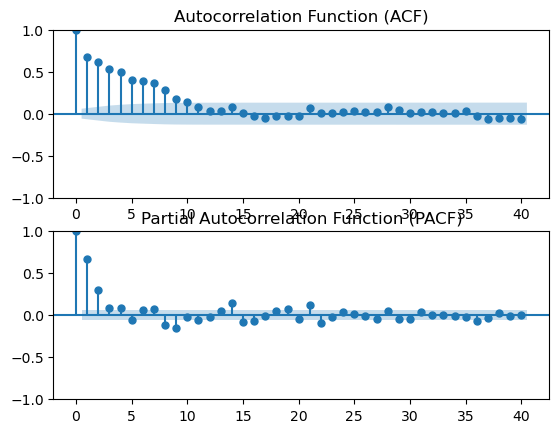

In [10]:
# Plotting ACF & PACF on ORIGINAL DATA
plt.subplot(2, 1, 1)
plot_acf(df_b, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_b, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

### The column is stationary but applying differencing just to see the lags clearly from the ACF and PACF plots because in the above diagram specially ACF plot the lags are significant for the higher values of lags. Again, if we see the PACF there is a slight chance that there is a seasonal pattern in the data at every 7th lag. To see those seasonal patterns clearly we are applying differencing to remove any small trend if present any

In [11]:
x = df_b.diff().dropna() # Differencing of first order

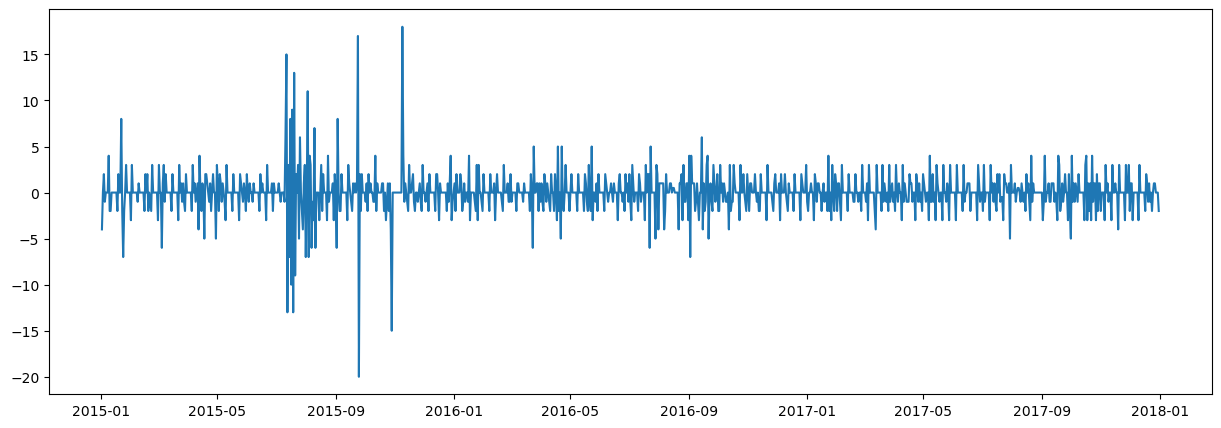

In [12]:
plt.figure(figsize=(15,5))
plt.plot(x)

In [13]:
# Splitting the dataset into train and test for validation. Last 6 months are in test dataset
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

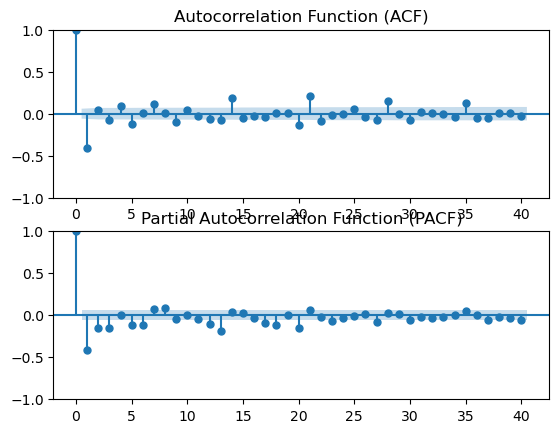

In [14]:
# Plotting ACF & PACF of the differenced data
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [15]:
# Fitting Auto Arima model for parameters but keeping the main controls of p, q in our hand which has been given 
# by observing ACF and PACF from above
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 2, seasonal = True, m = 7)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1004
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -2130.574
Date:                             Sat, 30 Sep 2023   AIC                           4273.149
Time:                                     08:16:46   BIC                           4302.619
Sample:                                          0   HQIC                          4284.347
                                            - 1004                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8877      0.042    -21.185      0.000      -0.970      -0.806
ma.L1          0.3918      0.045      8.618      0.000       0.303       0.481
ma.L2         -0.3633      0.030    -12.065      0.000      -0.422      -0.304
ar.S.L7        0.9862      0.006    158.904      0.000       0.974       0.998
ma.S.L7       -0.9288      0.015    -61.440      0.000      -0.958      -0.899
sigma2         4.0617      0.051     78.944      0.000       3.961       4.163
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):             32034.00
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# Fitting the model which has been given by Auto ARIMA
sarima_model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,1,7))
results = sarima_model.fit()

In [17]:
# Forecasting the lst 90 days and validating from the test dataset. Since SARIMA gives us a series object with index 
# 0,1,...90, so setting the index similar to test data index
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03    0.364164
2017-10-04   -0.539147
2017-10-05    0.422024
2017-10-06   -0.544754
2017-10-07   -1.342028
                ...   
2017-12-27   -0.345180
2017-12-28    0.258515
2017-12-29   -0.373539
2017-12-30   -1.214231
2017-12-31    1.174886
Name: predicted_mean, Length: 90, dtype: float64

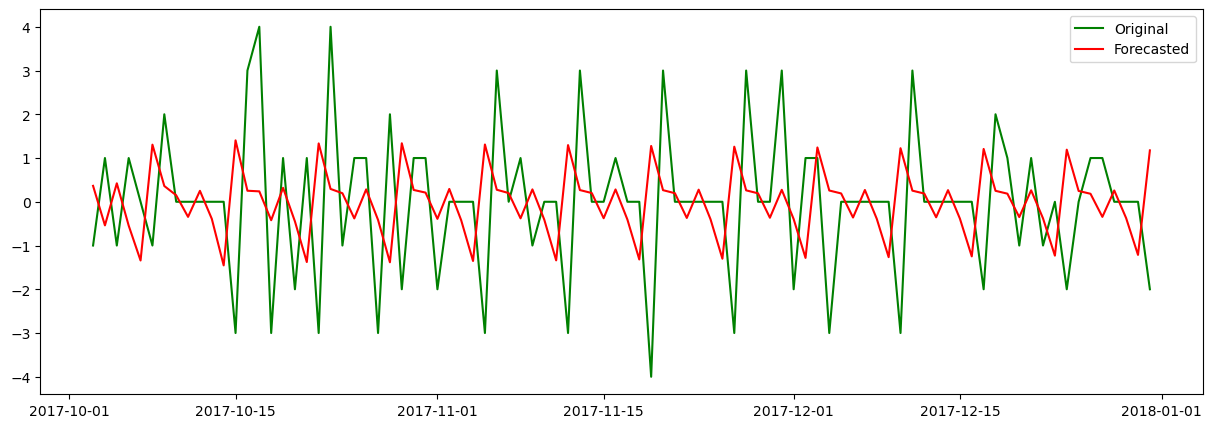

In [18]:
# Plotting the forecasted value and superimposing it on original value of test dataset
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [19]:
forecast

Year
2017-10-03    0.364164
2017-10-04   -0.539147
2017-10-05    0.422024
2017-10-06   -0.544754
2017-10-07   -1.342028
                ...   
2017-12-27   -0.345180
2017-12-28    0.258515
2017-12-29   -0.373539
2017-12-30   -1.214231
2017-12-31    1.174886
Name: predicted_mean, Length: 90, dtype: float64

In [20]:
test

Year
2017-10-03   -1.0
2017-10-04    1.0
2017-10-05   -1.0
2017-10-06    1.0
2017-10-07    0.0
             ... 
2017-12-27    1.0
2017-12-28    0.0
2017-12-29    0.0
2017-12-30    0.0
2017-12-31   -2.0
Name: bagbazar_day, Length: 90, dtype: float64

In [21]:
# Keeping the original values in the variable x
x = df_b[-91:]
x

Year
2017-10-02    74.0
2017-10-03    73.0
2017-10-04    74.0
2017-10-05    73.0
2017-10-06    74.0
              ... 
2017-12-27    75.0
2017-12-28    75.0
2017-12-29    75.0
2017-12-30    75.0
2017-12-31    73.0
Name: bagbazar_day, Length: 91, dtype: float64

In [22]:
# Reversing the SARIMA predictions to original scale of the data. Firstly keeping that in a list 
# and then setting the index same as the test set index
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

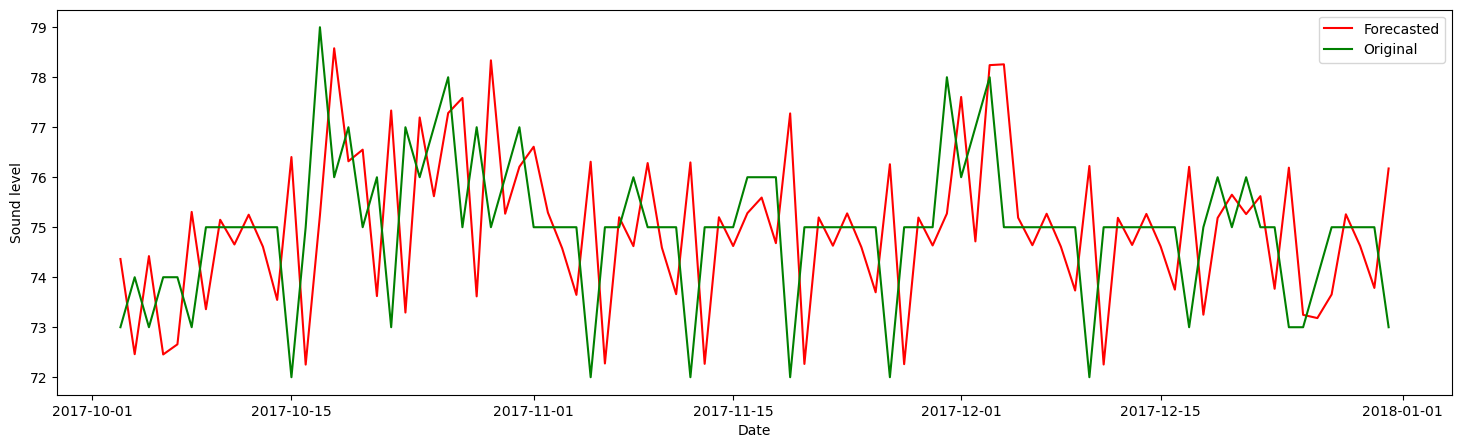

In [23]:
# Plotting the forecasted values and superimposing that in original dataset
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [24]:
rmse = math.sqrt(mean_squared_error(test, forecast))
rmse

2.0236222620732085

## Bagbazar Night

In [25]:
df_b = df['bagbazar_night'] # Extracting one column
df_b.head()

Year
2015-01-01    70.0
2015-01-02    67.0
2015-01-03    67.0
2015-01-04    67.0
2015-01-05    67.0
Name: bagbazar_night, dtype: float64

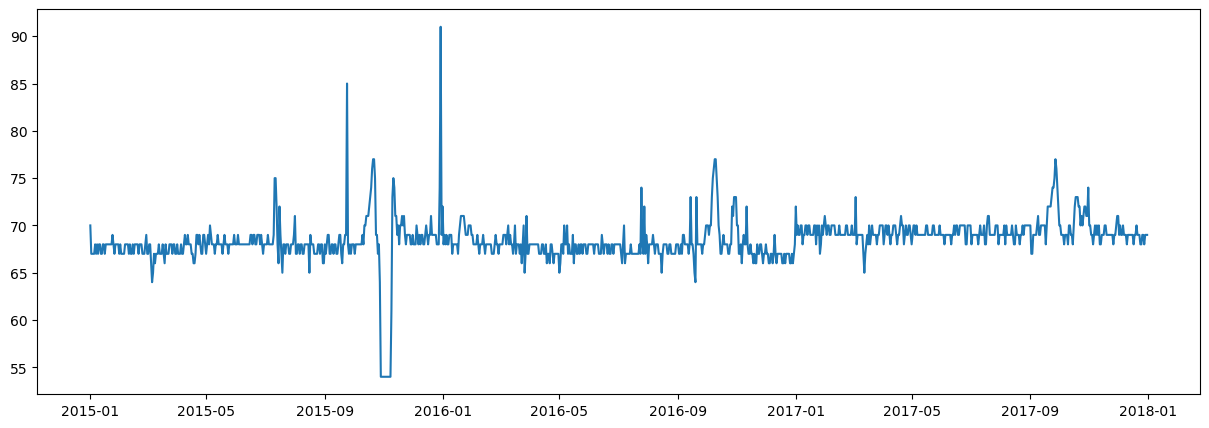

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df_b)

In [27]:
result = adfuller(df_b)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

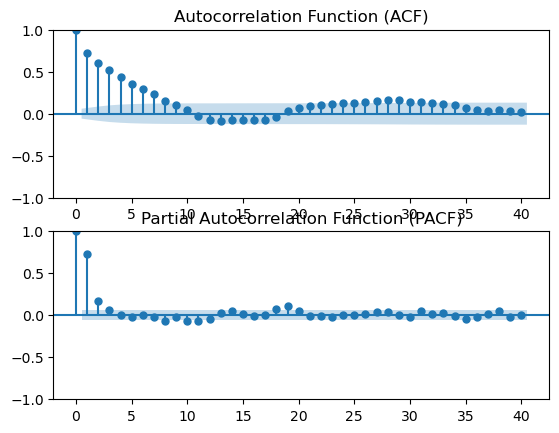

In [28]:
# Plotting ACF & PACF on ORIGINAL DATA
plt.subplot(2, 1, 1)
plot_acf(df_b, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_b, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [29]:
x = df_b.diff().dropna()

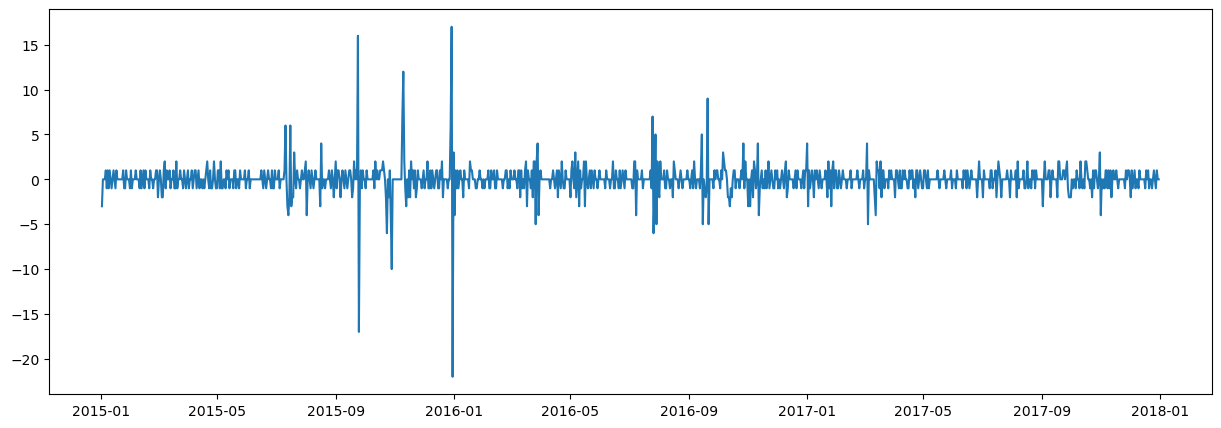

In [30]:
plt.figure(figsize=(15,5))
plt.plot(x)

In [31]:
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

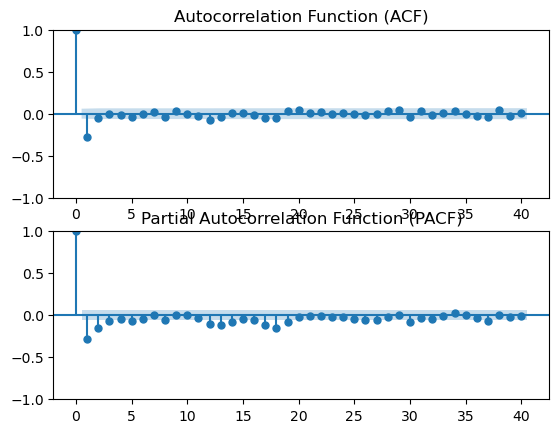

In [32]:
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [33]:
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1004
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1957.274
Date:                Sat, 30 Sep 2023   AIC                           3920.548
Time:                        08:16:56   BIC                           3935.283
Sample:                             0   HQIC                          3926.147
                               - 1004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3259      0.046      7.109      0.000       0.236       0.416
ma.L1         -0.6583      0.042    -15.501      0.000      -0.742      -0.575
sigma2         2.8889      0.029    100.778      0.000       2.833       2.945
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             64925.57
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
arima_model = ARIMA(train, order=(1,0,1))
results = arima_model.fit()

In [35]:
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03    0.279516
2017-10-04    0.092984
2017-10-05    0.032133
2017-10-06    0.012283
2017-10-07    0.005807
                ...   
2017-12-27    0.002672
2017-12-28    0.002672
2017-12-29    0.002672
2017-12-30    0.002672
2017-12-31    0.002672
Name: predicted_mean, Length: 90, dtype: float64

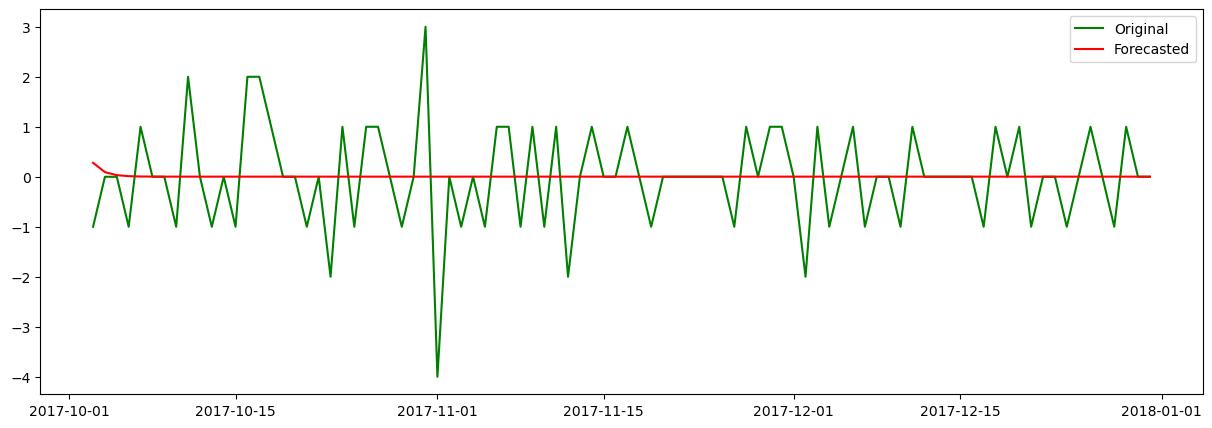

In [36]:
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [37]:
x = df_b[-91:]
x

Year
2017-10-02    70.0
2017-10-03    69.0
2017-10-04    69.0
2017-10-05    69.0
2017-10-06    68.0
              ... 
2017-12-27    69.0
2017-12-28    68.0
2017-12-29    69.0
2017-12-30    69.0
2017-12-31    69.0
Name: bagbazar_night, Length: 91, dtype: float64

In [38]:
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

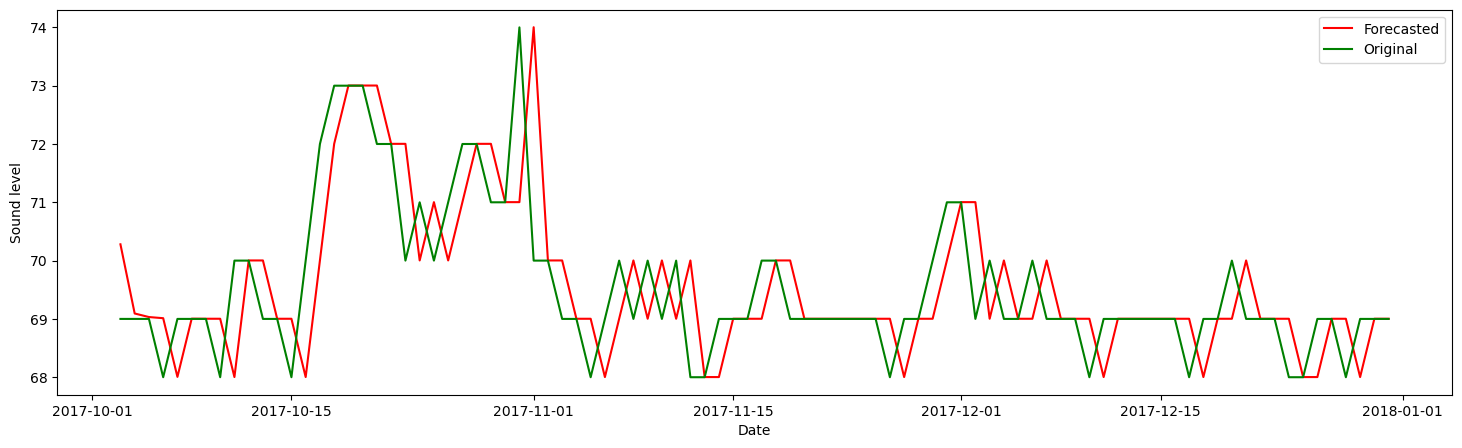

In [39]:
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [40]:
rmse = math.sqrt(mean_squared_error(test, forecast))
rmse

1.009183801355206

## Golpark Day

In [41]:
df_g = df['golepark_day'] # Extracting one column
df_g.head()

Year
2015-01-01    69.0
2015-01-02    70.0
2015-01-03    70.0
2015-01-04    69.0
2015-01-05    69.0
Name: golepark_day, dtype: float64

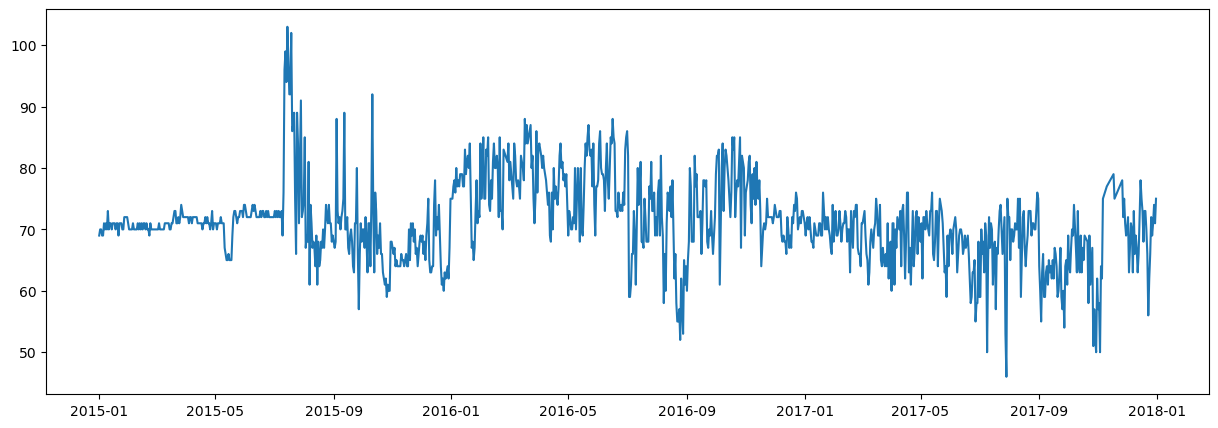

In [42]:
plt.figure(figsize=(15,5))
plt.plot(df_g)

In [43]:
result = adfuller(df_g)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

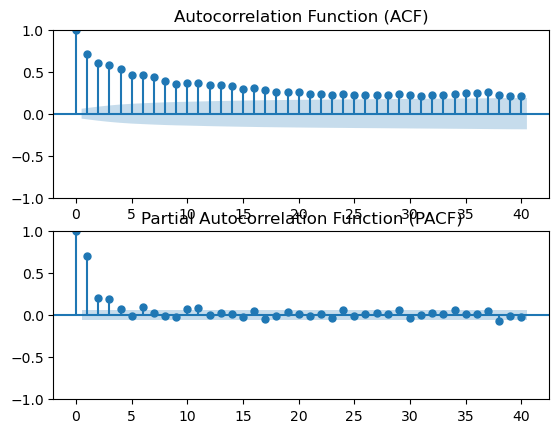

In [44]:
plt.subplot(2, 1, 1)
plot_acf(df_g, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_g, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [45]:
x = df_g.diff().dropna()

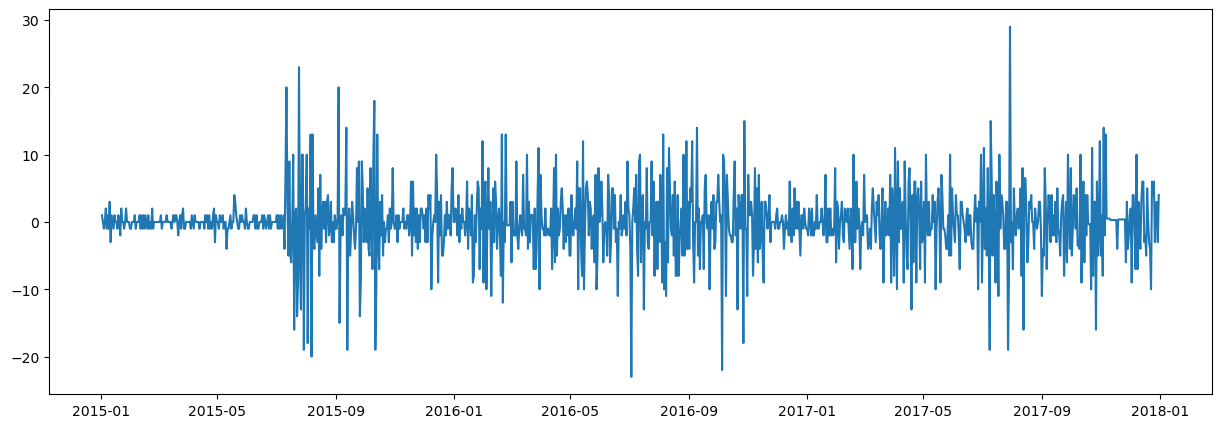

In [46]:
plt.figure(figsize=(15,5))
plt.plot(x)

In [47]:
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

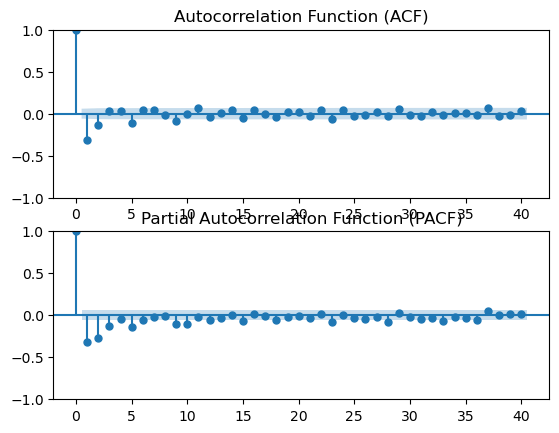

In [48]:
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [49]:
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1004
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2945.792
Date:                Sat, 30 Sep 2023   AIC                           5899.584
Time:                        08:17:02   BIC                           5919.231
Sample:                             0   HQIC                          5907.050
                               - 1004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7242      0.042     17.210      0.000       0.642       0.807
ma.L1         -1.2445      0.050    -24.867      0.000      -1.343      -1.146
ma.L2          0.2839      0.043      6.620      0.000       0.200       0.368
sigma2        20.6830      0.575     35.940      0.000      19.555      21.811
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               469.12
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.02
Prob(H) (two-sided):                  0.90   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
arima_model = ARIMA(train, order=(1,0,2))
results = arima_model.fit()

In [51]:
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03   -0.198036
2017-10-04   -0.145439
2017-10-05   -0.107294
2017-10-06   -0.079630
2017-10-07   -0.059567
                ...   
2017-12-27   -0.006611
2017-12-28   -0.006611
2017-12-29   -0.006611
2017-12-30   -0.006611
2017-12-31   -0.006611
Name: predicted_mean, Length: 90, dtype: float64

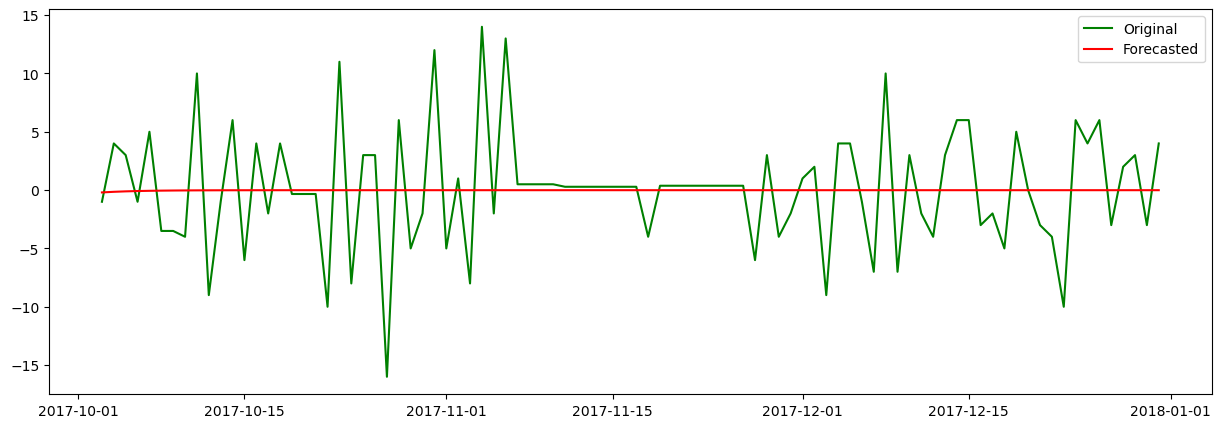

In [52]:
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [53]:
x = df_g[-91:]
x

Year
2017-10-02    64.0
2017-10-03    63.0
2017-10-04    67.0
2017-10-05    70.0
2017-10-06    69.0
              ... 
2017-12-27    69.0
2017-12-28    71.0
2017-12-29    74.0
2017-12-30    71.0
2017-12-31    75.0
Name: golepark_day, Length: 91, dtype: float64

In [54]:
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

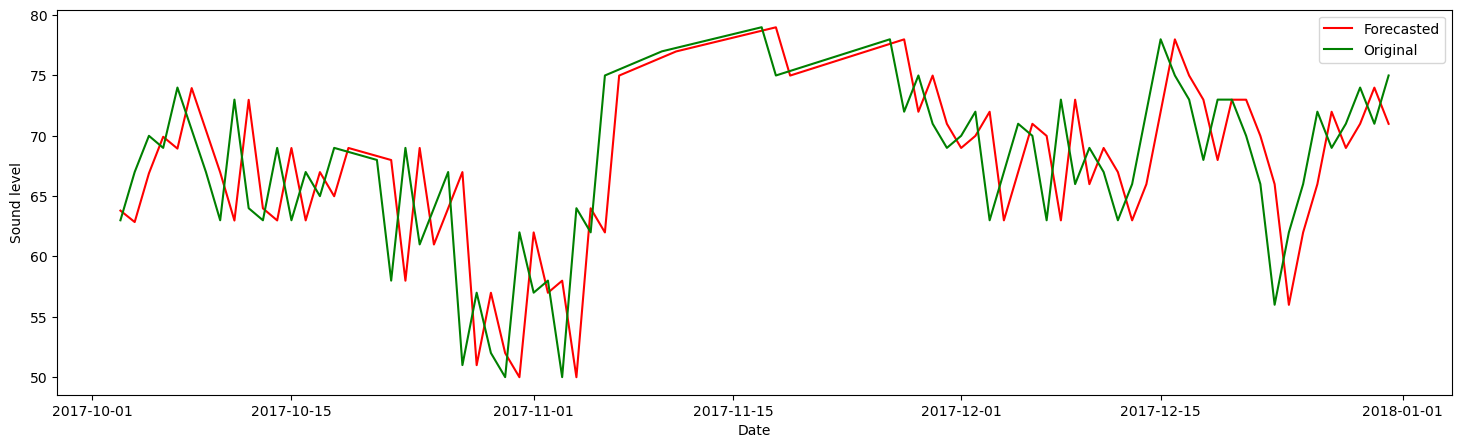

In [55]:
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [56]:
rmse = math.sqrt(mean_squared_error(df_g[-90:], l))
rmse

5.2121443595407335

## Golpark Night

In [57]:
df_g = df['golepark_night'] # Extracting one column
df_g.head()

Year
2015-01-01    65.0
2015-01-02    66.0
2015-01-03    66.0
2015-01-04    66.0
2015-01-05    66.0
Name: golepark_night, dtype: float64

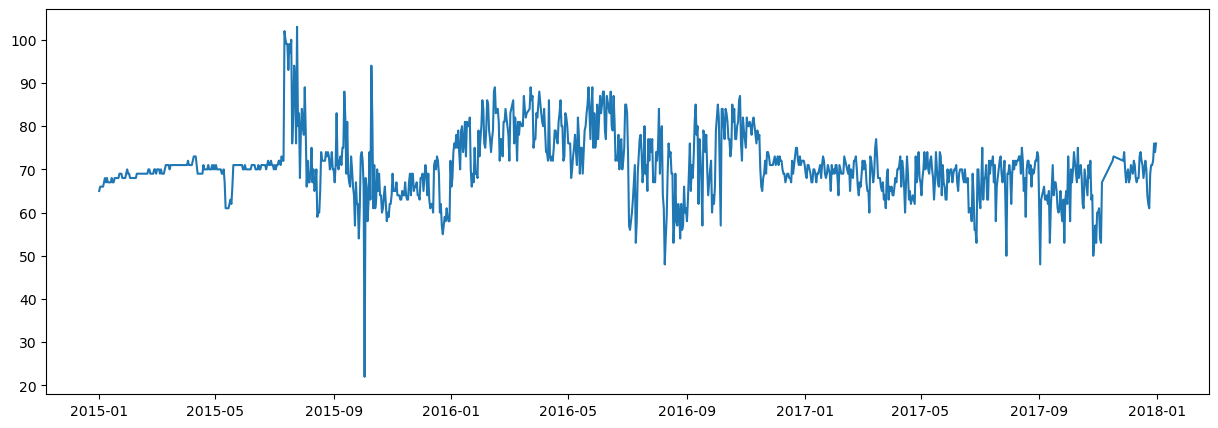

In [58]:
plt.figure(figsize=(15,5))
plt.plot(df_g)

In [59]:
result = adfuller(df_g)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

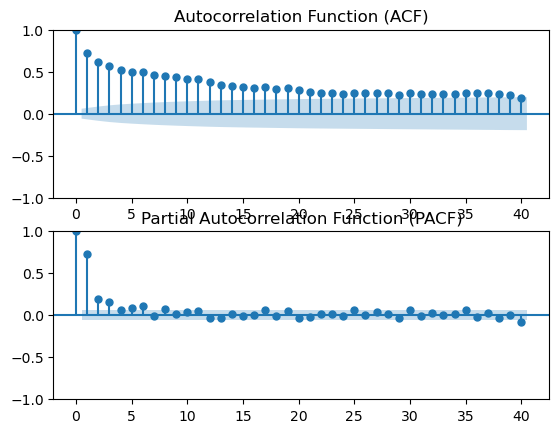

In [60]:
plt.subplot(2, 1, 1)
plot_acf(df_g, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_g, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [61]:
x = df_g.diff().dropna()

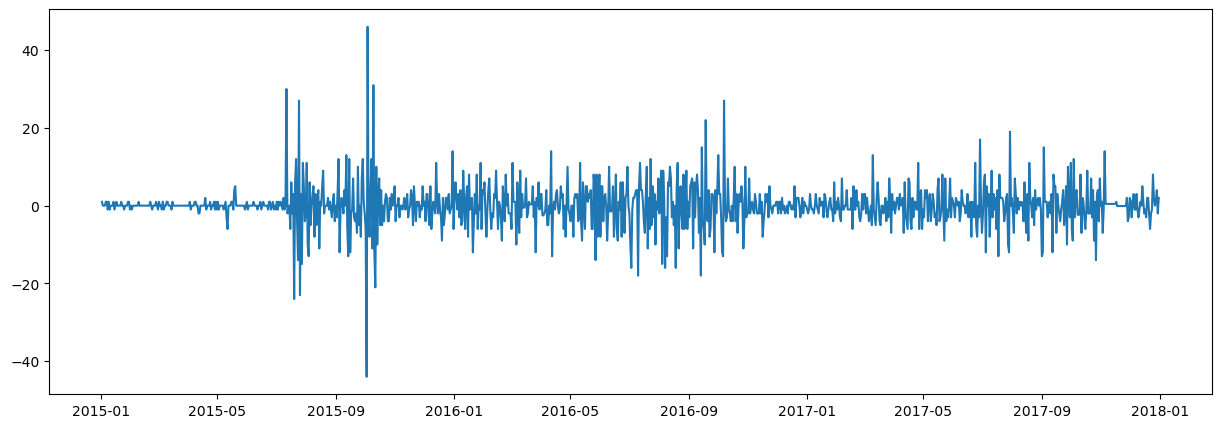

In [62]:
plt.figure(figsize=(15,5))
plt.plot(x)

In [63]:
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

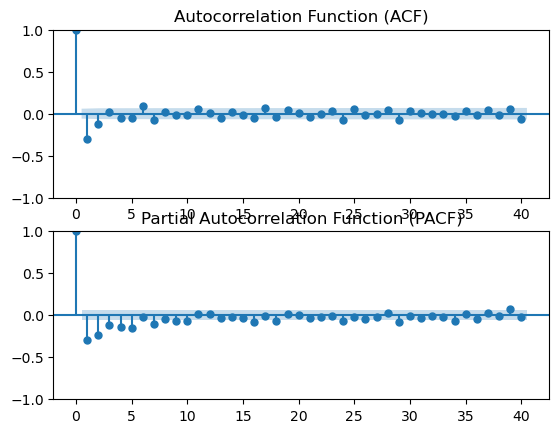

In [64]:
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [65]:
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 2, seasonal = True, m = 7)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1004
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 7)   Log Likelihood               -3044.518
Date:                           Sat, 30 Sep 2023   AIC                           6097.036
Time:                                   08:17:21   BIC                           6116.683
Sample:                                        0   HQIC                          6104.501
                                          - 1004                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3762      0.026     14.265      0.000       0.325       0.428
ma.L1         -0.8367      0.020    -42.403      0.000      -0.875      -0.798
ma.S.L7       -0.0675      0.017     -3.933      0.000      -0.101      -0.034
sigma2        25.1857      0.468     53.818      0.000      24.268      26.103
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4310.62
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
sarima_model = SARIMAX(train, order=(1,0,1), seasonal_order=(0,0,1,7))
results = sarima_model.fit()

In [67]:
#arima_model = ARIMA(train, order=(2,0,2))
#results = arima_model.fit()

In [68]:
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03    1.615355e-01
2017-10-04   -8.715949e-01
2017-10-05   -2.161380e-01
2017-10-06    1.583231e-01
2017-10-07   -7.316618e-01
                  ...     
2017-12-27    2.705723e-35
2017-12-28    1.017983e-35
2017-12-29    3.829988e-36
2017-12-30    1.440969e-36
2017-12-31    5.421402e-37
Name: predicted_mean, Length: 90, dtype: float64

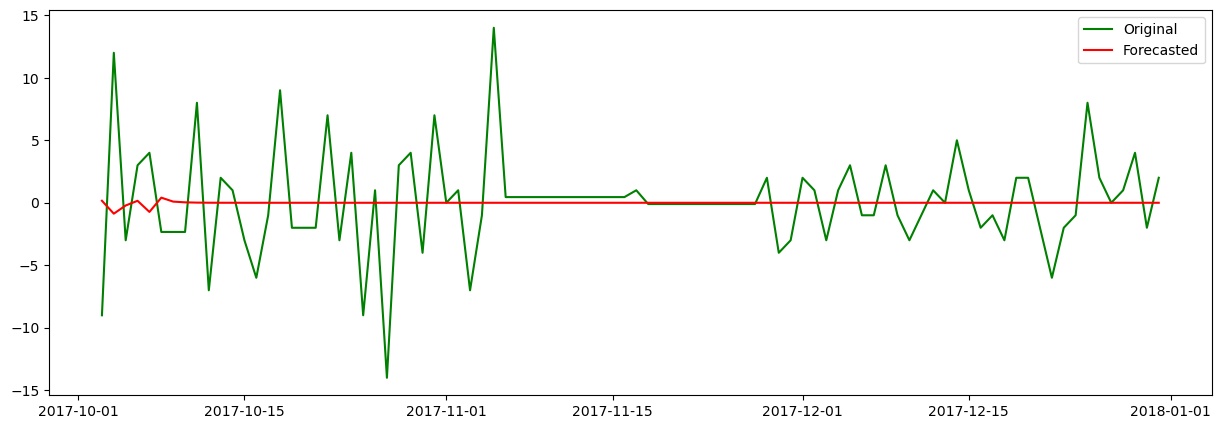

In [69]:
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [70]:
x = df_g[-91:]
x

Year
2017-10-02    67.0
2017-10-03    58.0
2017-10-04    70.0
2017-10-05    67.0
2017-10-06    70.0
              ... 
2017-12-27    71.0
2017-12-28    72.0
2017-12-29    76.0
2017-12-30    74.0
2017-12-31    76.0
Name: golepark_night, Length: 91, dtype: float64

In [71]:
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

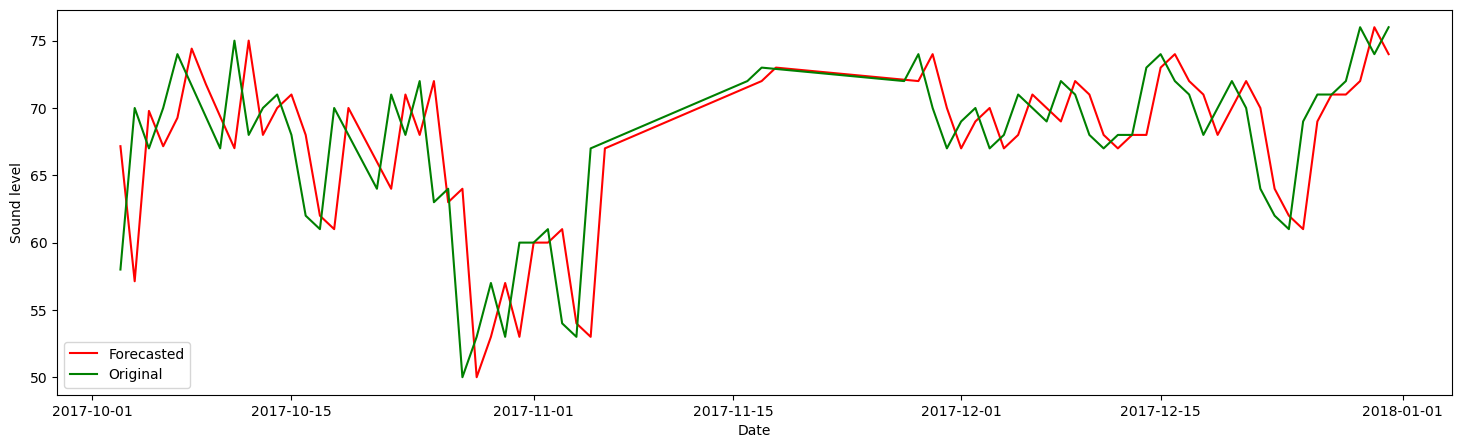

In [72]:
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [73]:
rmse = math.sqrt(mean_squared_error(df_g[-90:], l))
rmse

4.107009334841876

## New Market Day

In [74]:
df_n = df['newmarket_day'] # Extracting one column
df_n.head()

Year
2015-01-01    73.0
2015-01-02    72.0
2015-01-03    74.0
2015-01-04    76.0
2015-01-05    72.0
Name: newmarket_day, dtype: float64

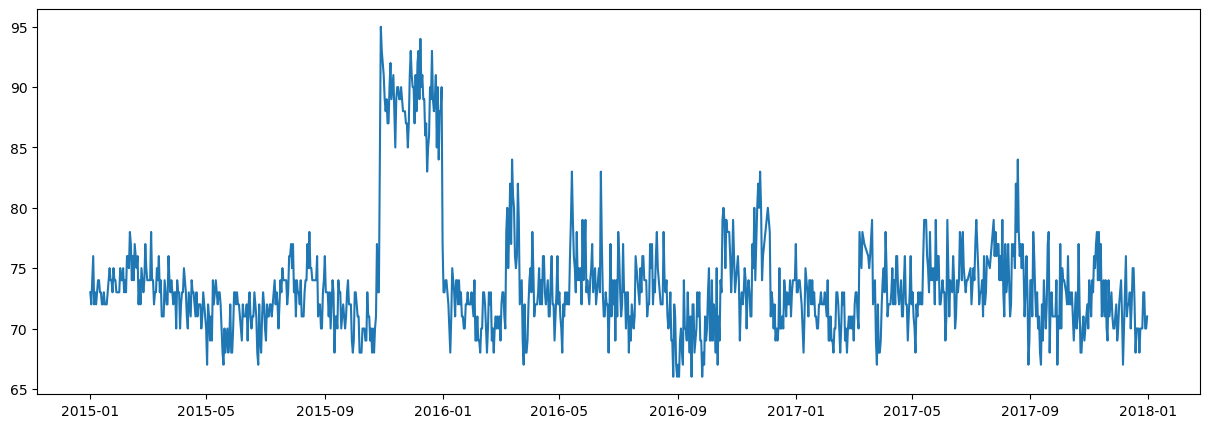

In [75]:
plt.figure(figsize=(15,5))
plt.plot(df_n)

In [76]:
result = adfuller(df_n)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

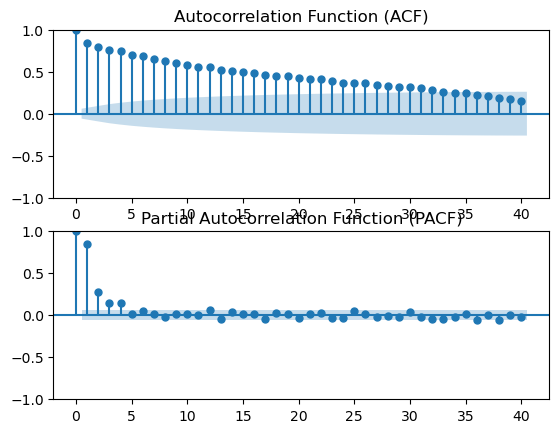

In [77]:
plt.subplot(2, 1, 1)
plot_acf(df_n, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_n, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

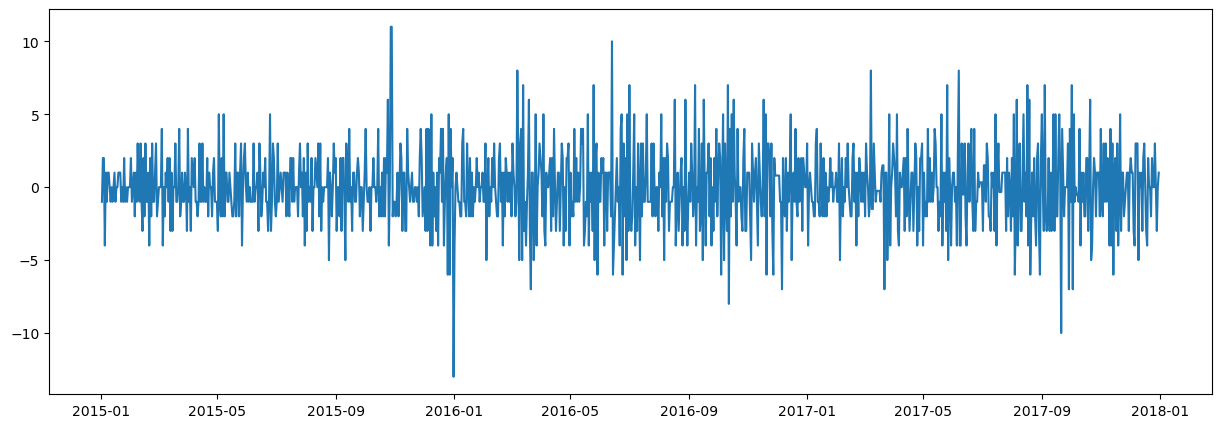

In [78]:
x = df_n.diff().dropna()
plt.figure(figsize=(15,5))
plt.plot(x)

In [79]:
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

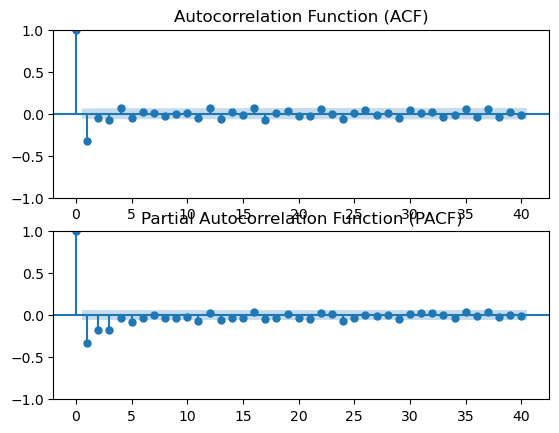

In [80]:
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [81]:
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 2, seasonal = True, m=4)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1004
Model:             SARIMAX(1, 0, 2)x(0, 0, [1], 4)   Log Likelihood               -2313.747
Date:                             Sat, 30 Sep 2023   AIC                           4637.495
Time:                                     08:17:52   BIC                           4662.054
Sample:                                          0   HQIC                          4646.827
                                            - 1004                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6412      0.105      6.090      0.000       0.435       0.848
ma.L1         -1.0632      0.110     -9.637      0.000      -1.279      -0.847
ma.L2          0.1829      0.068      2.677      0.007       0.049       0.317
ma.S.L4        0.0902      0.032      2.786      0.005       0.027       0.154
sigma2         5.8758      0.195     30.104      0.000       5.493       6.258
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               371.81
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
sarima_model = SARIMAX(train, order=(1,0,2), seasonal_order=(0,0,1,4))
results = sarima_model.fit()

In [83]:
# arima_model = ARIMA(train, order=(2,0,2))
# results = arima_model.fit()

In [84]:
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03   -1.113112e-01
2017-10-04   -3.942241e-01
2017-10-05    4.101565e-01
2017-10-06   -3.547221e-01
2017-10-07   -1.230862e-01
                  ...     
2017-12-27   -2.857453e-17
2017-12-28   -1.832162e-17
2017-12-29   -1.174759e-17
2017-12-30   -7.532402e-18
2017-12-31   -4.829679e-18
Name: predicted_mean, Length: 90, dtype: float64

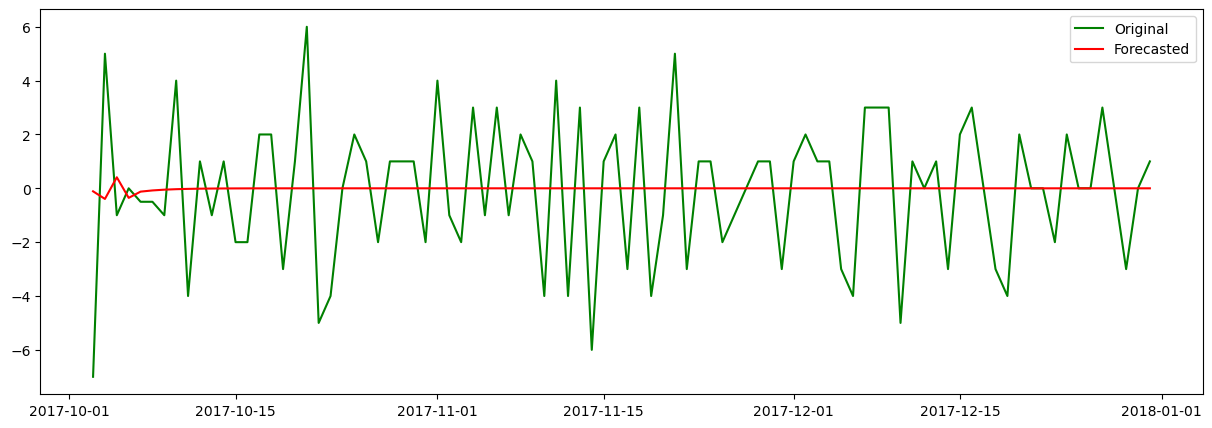

In [85]:
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [86]:
x = df_n[-91:]
x

Year
2017-10-02    77.0
2017-10-03    70.0
2017-10-04    75.0
2017-10-05    74.0
2017-10-06    74.0
              ... 
2017-12-27    73.0
2017-12-28    73.0
2017-12-29    70.0
2017-12-30    70.0
2017-12-31    71.0
Name: newmarket_day, Length: 91, dtype: float64

In [87]:
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

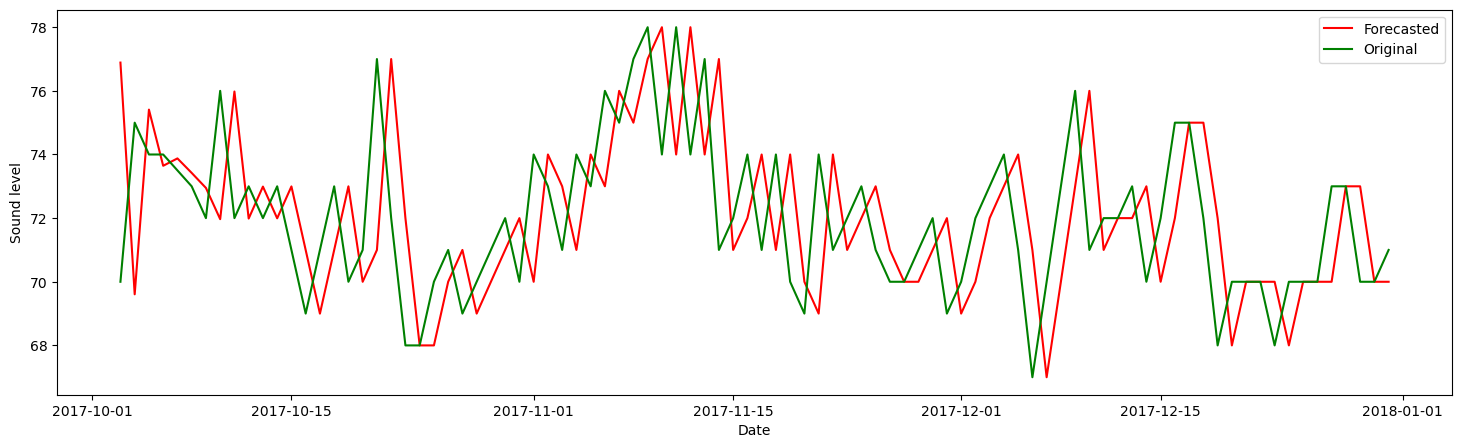

In [88]:
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [89]:
rmse = math.sqrt(mean_squared_error(df_n[-90:], l))
rmse

2.6436225309451538

## New Market Night

In [90]:
df_ng = df['newmarket_night'] # Extracting one column
df_ng.head()

Year
2015-01-01    73.0
2015-01-02    71.0
2015-01-03    72.0
2015-01-04    72.0
2015-01-05    72.0
Name: newmarket_night, dtype: float64

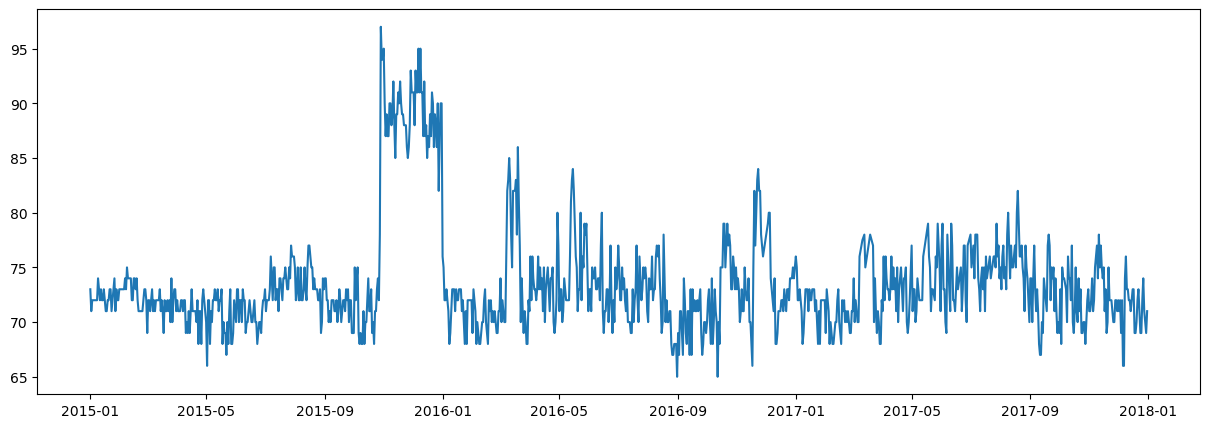

In [91]:
plt.figure(figsize=(15,5))
plt.plot(df_ng)

In [92]:
result = adfuller(df_ng)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

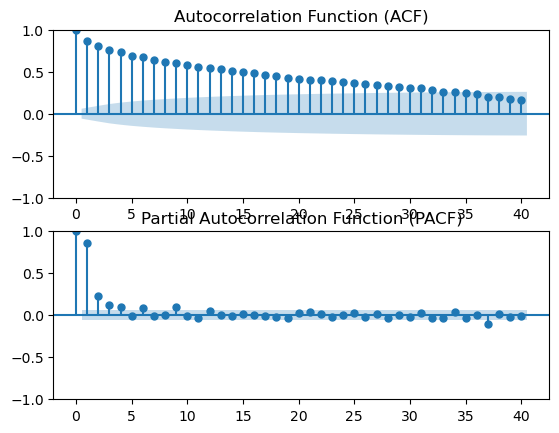

In [93]:
plt.subplot(2, 1, 1)
plot_acf(df_ng, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_ng, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

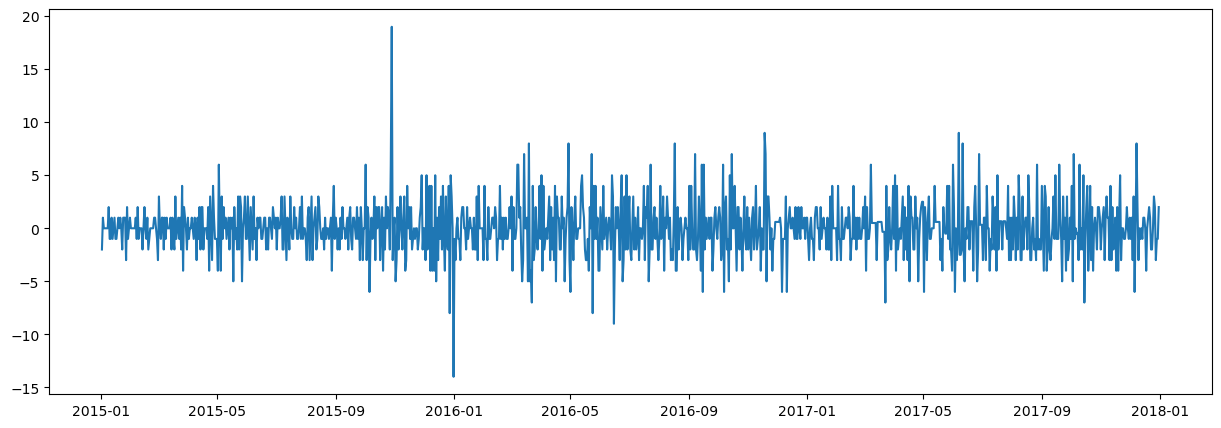

In [94]:
x = df_ng.diff().dropna()
plt.figure(figsize=(15,5))
plt.plot(x)

In [95]:
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

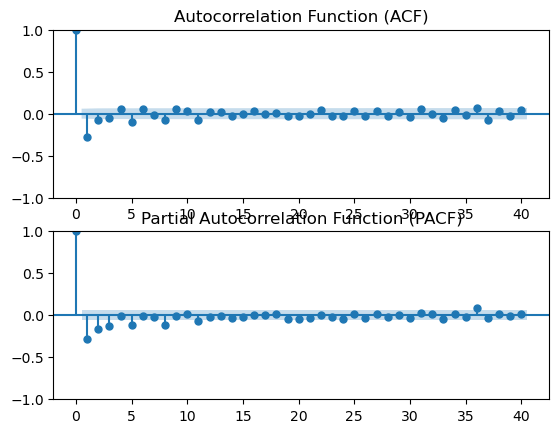

In [96]:
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [97]:
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1004
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2311.409
Date:                Sat, 30 Sep 2023   AIC                           4630.817
Time:                        08:17:58   BIC                           4650.464
Sample:                             0   HQIC                          4638.283
                               - 1004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7278      0.080      9.092      0.000       0.571       0.885
ma.L1         -1.0804      0.088    -12.250      0.000      -1.253      -0.908
ma.L2          0.1778      0.053      3.374      0.001       0.074       0.281
sigma2         5.8486      0.132     44.340      0.000       5.590       6.107
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2135.59
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.72
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
arima_model = ARIMA(train, order=(1,0,2))
results = arima_model.fit()

In [99]:
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03   -0.022103
2017-10-04   -0.016158
2017-10-05   -0.011831
2017-10-06   -0.008682
2017-10-07   -0.006390
                ...   
2017-12-27   -0.000263
2017-12-28   -0.000263
2017-12-29   -0.000263
2017-12-30   -0.000263
2017-12-31   -0.000263
Name: predicted_mean, Length: 90, dtype: float64

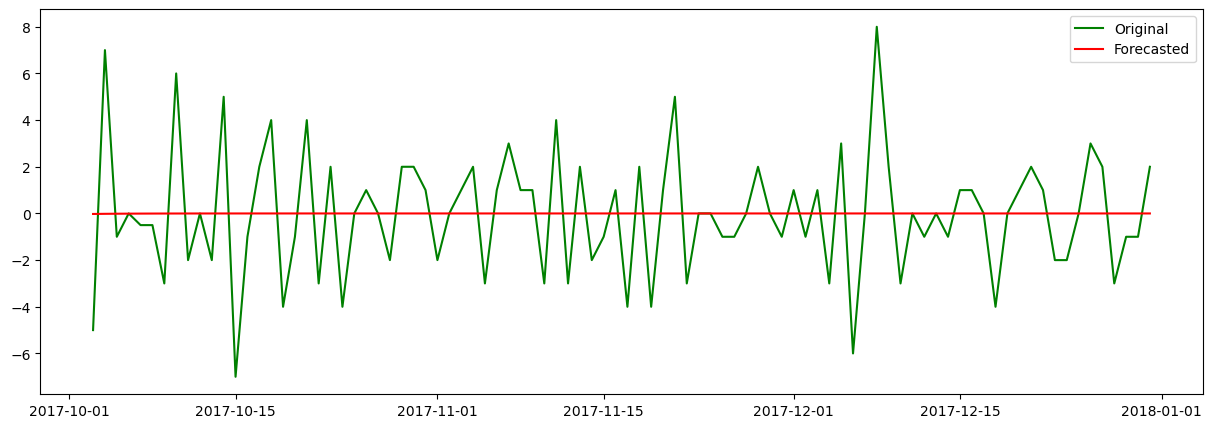

In [100]:
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [101]:
x = df_ng[-91:]
x

Year
2017-10-02    73.0
2017-10-03    68.0
2017-10-04    75.0
2017-10-05    74.0
2017-10-06    74.0
              ... 
2017-12-27    74.0
2017-12-28    71.0
2017-12-29    70.0
2017-12-30    69.0
2017-12-31    71.0
Name: newmarket_night, Length: 91, dtype: float64

In [102]:
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

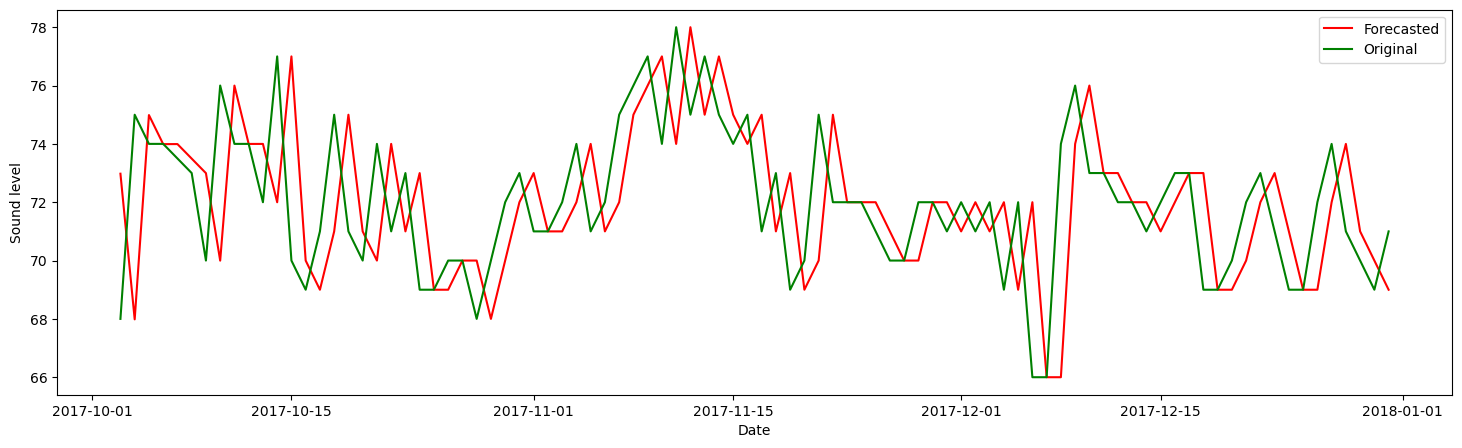

In [103]:
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [104]:
rmse = math.sqrt(mean_squared_error(df_ng[-90:], l))
rmse

2.682182780680707

## RG Kar Day

In [105]:
df_r = df['rgkaur_day'] # Extracting one column
df_r.head()

Year
2015-01-01    63
2015-01-02    65
2015-01-03    64
2015-01-04    63
2015-01-05    65
Name: rgkaur_day, dtype: int64

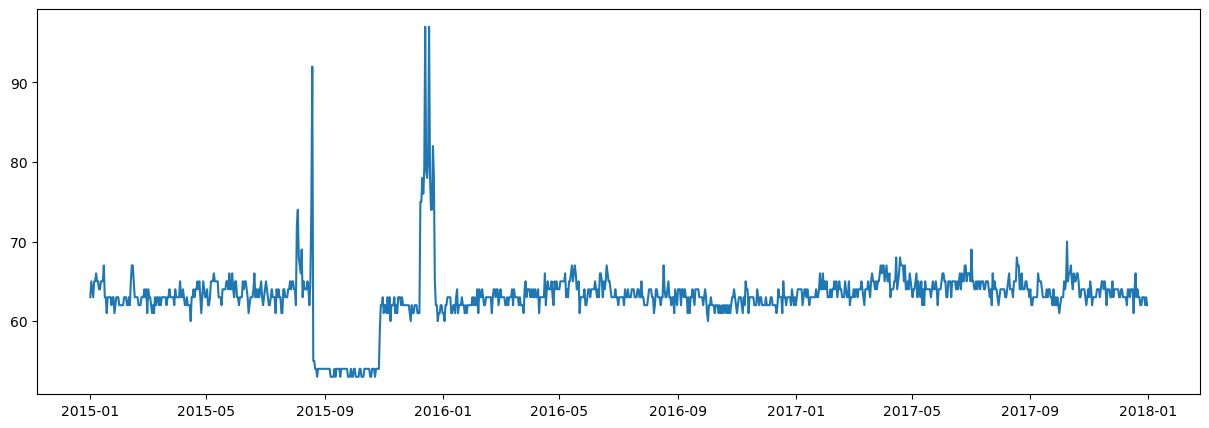

In [106]:
plt.figure(figsize=(15,5))
plt.plot(df_r)

In [107]:
result = adfuller(df_r)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

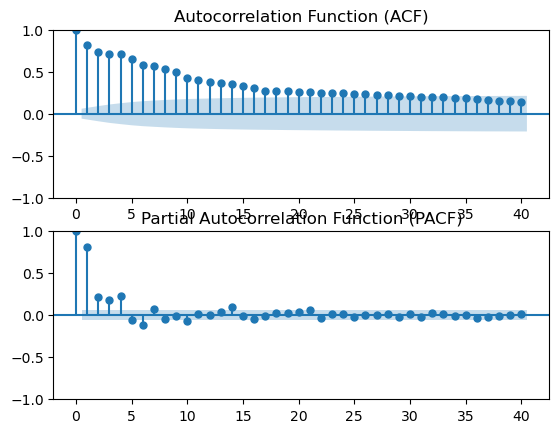

In [108]:
plt.subplot(2, 1, 1)
plot_acf(df_r, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_r, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

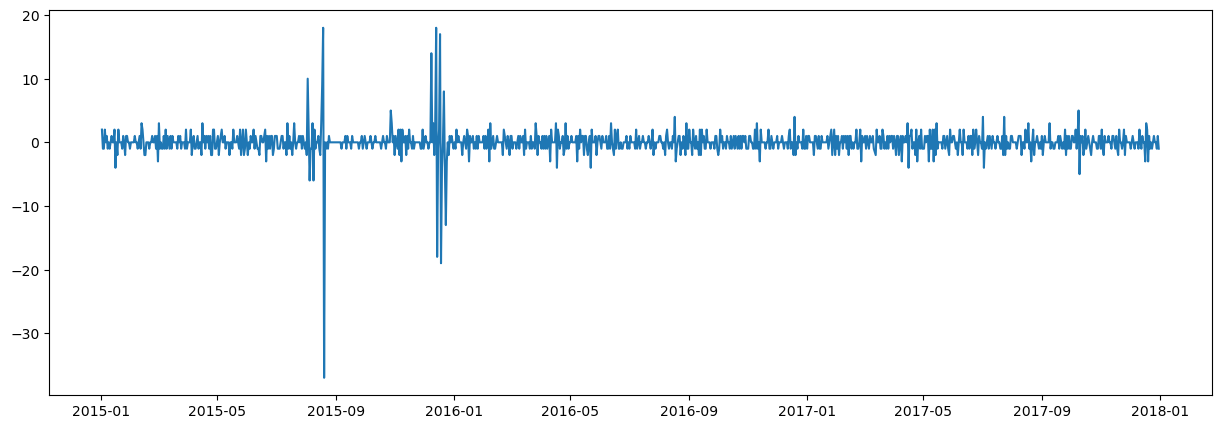

In [109]:
x = df_r.diff().dropna()
plt.figure(figsize=(15,5))
plt.plot(x)

In [110]:
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

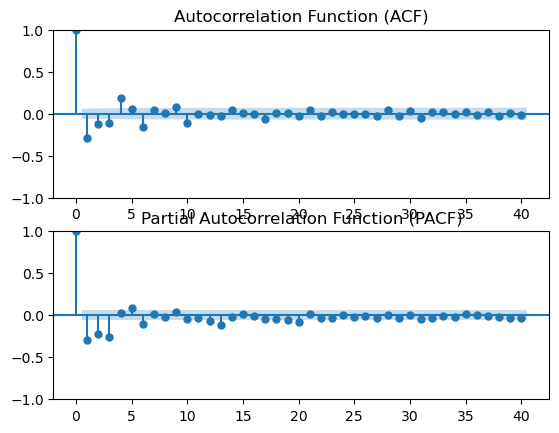

In [111]:
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [112]:
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 3)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1004
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2143.442
Date:                Sat, 30 Sep 2023   AIC                           4294.883
Time:                        08:18:03   BIC                           4314.530
Sample:                             0   HQIC                          4302.349
                               - 1004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4125      0.007    -61.835      0.000      -0.426      -0.399
ar.L2         -0.3138      0.010    -32.057      0.000      -0.333      -0.295
ar.L3         -0.2582      0.009    -30.030      0.000      -0.275      -0.241
sigma2         4.1851      0.039    107.641      0.000       4.109       4.261
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            121663.68
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
arima_model = ARIMA(train, order=(3,0,0))
results = arima_model.fit()

In [114]:
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03   -0.123342
2017-10-04   -0.259574
2017-10-05    0.102175
2017-10-06    0.067878
2017-10-07    0.003679
                ...   
2017-12-27   -0.001649
2017-12-28   -0.001649
2017-12-29   -0.001649
2017-12-30   -0.001649
2017-12-31   -0.001649
Name: predicted_mean, Length: 90, dtype: float64

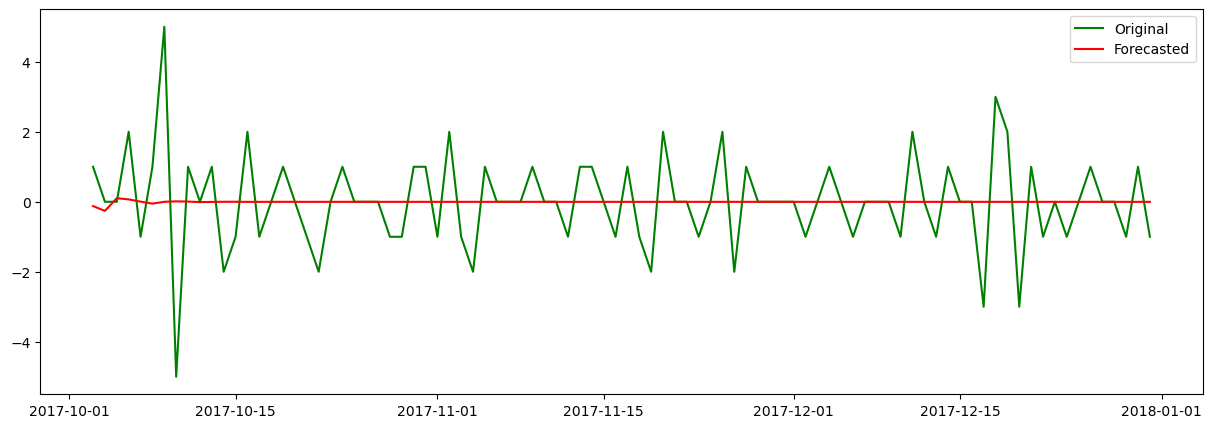

In [115]:
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [116]:
x = df_r[-91:]
x

Year
2017-10-02    62
2017-10-03    63
2017-10-04    63
2017-10-05    63
2017-10-06    65
              ..
2017-12-27    63
2017-12-28    63
2017-12-29    62
2017-12-30    63
2017-12-31    62
Name: rgkaur_day, Length: 91, dtype: int64

In [117]:
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

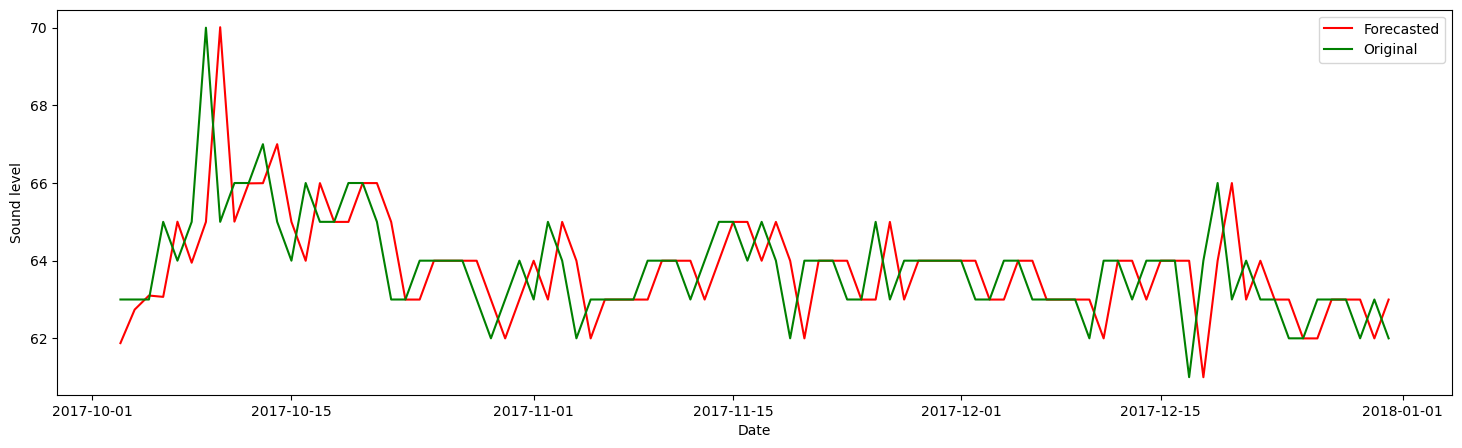

In [118]:
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [119]:
rmse = math.sqrt(mean_squared_error(df_r[-90:], l))
rmse

1.351162095118202

## RG Kar Night

In [120]:
df_rg = df['rgkaur_night'] # Extracting one column
df_rg.head()

Year
2015-01-01    60.0
2015-01-02    54.0
2015-01-03    59.0
2015-01-04    55.0
2015-01-05    61.0
Name: rgkaur_night, dtype: float64

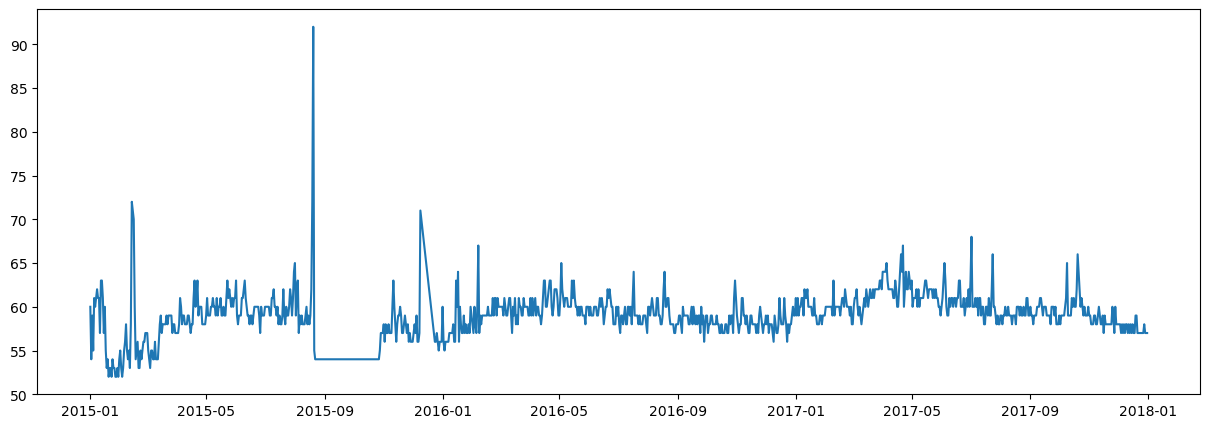

In [121]:
plt.figure(figsize=(15,5))
plt.plot(df_rg)

In [122]:
result = adfuller(df_rg)
if result[1] <= 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Stationary


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

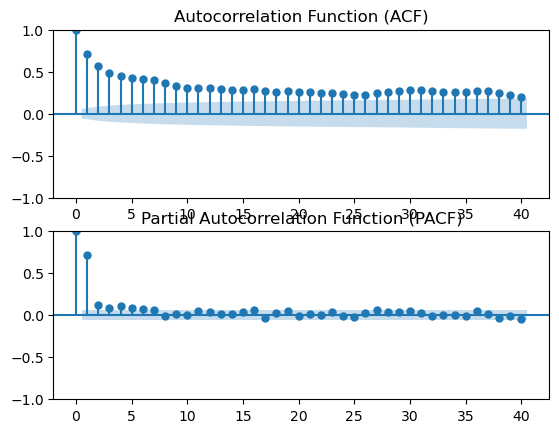

In [123]:
plt.subplot(2, 1, 1)
plot_acf(df_rg, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(df_rg, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

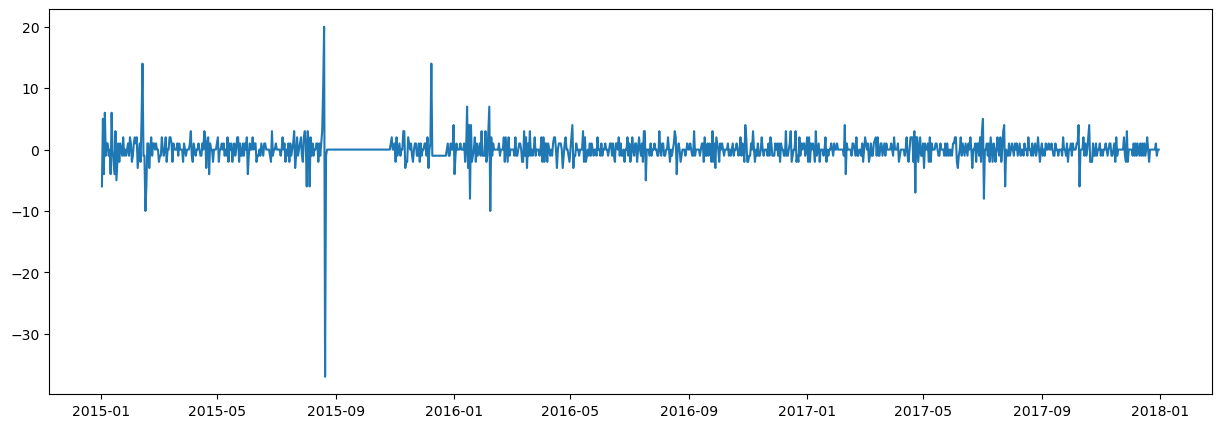

In [124]:
x = df_rg.diff().dropna()
plt.figure(figsize=(15,5))
plt.plot(x)

In [125]:
train = x[:-90]
test = x[-90:]

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

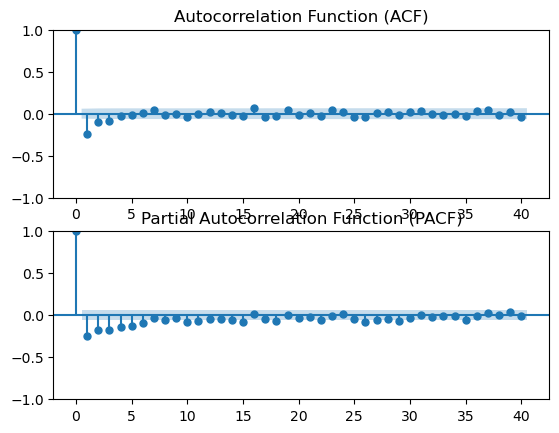

In [126]:
plt.subplot(2, 1, 1)
plot_acf(x, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(x, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

In [127]:
model = auto_arima(train, start_p = 1, start_q = 1, max_p = 4, max_q = 3)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1004
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -2112.260
Date:                Sat, 30 Sep 2023   AIC                           4230.519
Time:                        08:18:09   BIC                           4245.255
Sample:                             0   HQIC                          4236.119
                               - 1004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5397      0.018     29.235      0.000       0.503       0.576
ma.L1         -0.9329      0.017    -54.399      0.000      -0.966      -0.899
sigma2         3.9307      0.038    103.439      0.000       3.856       4.005
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):            121976.69
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
arima_model = ARIMA(train, order=(1,0,1))
results = arima_model.fit()

In [129]:
forecast = results.predict(start = 1005, end = 1094)
forecast.index = test.index
forecast

Year
2017-10-03    0.263861
2017-10-04    0.142995
2017-10-05    0.077744
2017-10-06    0.042517
2017-10-07    0.023499
                ...   
2017-12-27    0.001185
2017-12-28    0.001185
2017-12-29    0.001185
2017-12-30    0.001185
2017-12-31    0.001185
Name: predicted_mean, Length: 90, dtype: float64

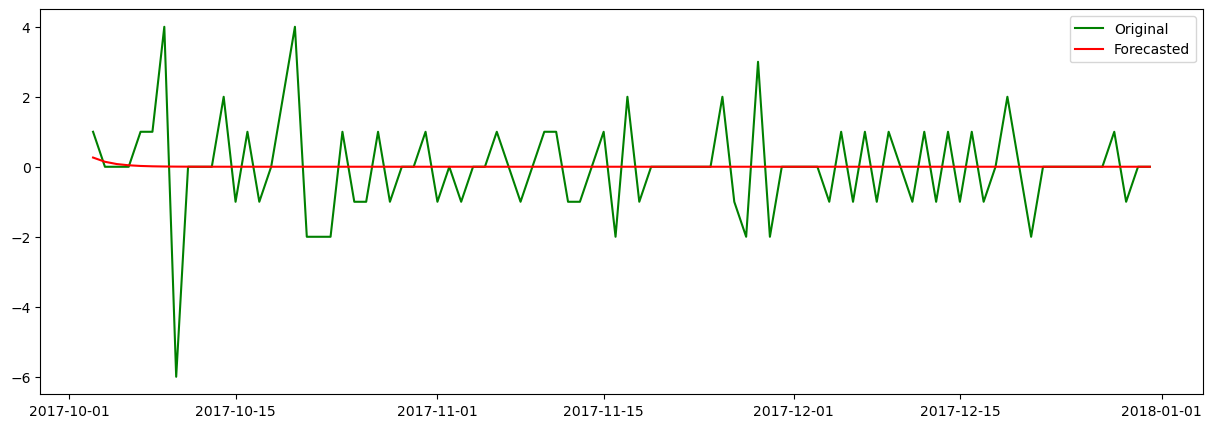

In [130]:
plt.figure(figsize = (15, 5))
plt.plot(test, color = 'green', label = 'Original')
plt.plot(forecast, color = 'red', label = 'Forecasted')
plt.legend()

In [131]:
x = df_rg[-91:]
x

Year
2017-10-02    58.0
2017-10-03    59.0
2017-10-04    59.0
2017-10-05    59.0
2017-10-06    59.0
              ... 
2017-12-27    57.0
2017-12-28    58.0
2017-12-29    57.0
2017-12-30    57.0
2017-12-31    57.0
Name: rgkaur_night, Length: 91, dtype: float64

In [132]:
l=[]
for i in range(90):
    o= x[i]+forecast[i]
    l.append(o)
    
l = pd.Series(l)
l.index = test.index

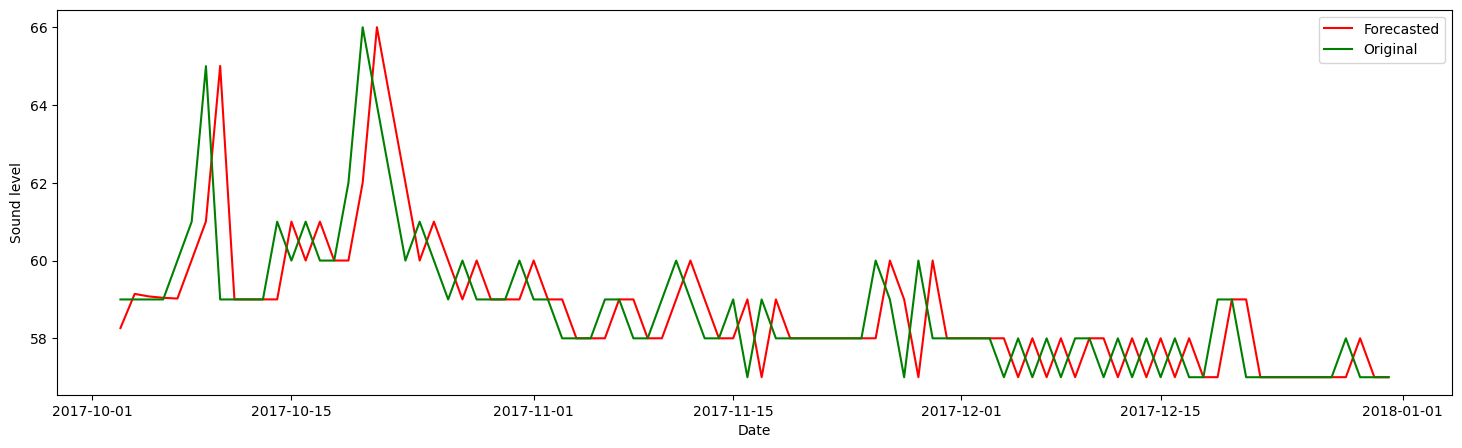

In [133]:
plt.figure(figsize=(18,5))
plt.plot(l, color = 'red', label = 'Forecasted')
plt.plot(x[1:], color = 'green', label = 'Original')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sound level')
plt.show()

In [134]:
rmse = math.sqrt(mean_squared_error(df_rg[-90:], l))
rmse

1.3436940281340901